# Read dataset

In [72]:
import pandas as pd
import numpy as np
from ml_functions import *

df = pd.read_csv('toy_dataset.csv', index_col=0)

df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

display(df.head())
print(df.shape)

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,outputK,r14,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status,strain
0,0.0,0.1,-0.1,-0.2,1.2,1.0,1.0,1.0,1.0,-6.938894e-17,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,r1,3.0,infeasible,1
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r3,9.0,optimal,1
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r2,9.0,optimal,1
3,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r4,9.0,optimal,1
4,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r5,9.0,infeasible,1


(4046, 25)


Intial dataset size.

In [73]:
df[['rxn_a','rxn_b','rxn_c']] = df['id'].str.split(',', expand=True)

In [74]:
def count_deletions(x):

    return len(x.split(','))

no_delitions = []
for row in range(len(df)):

    num = count_deletions(df['id'].iloc[row])
    no_delitions.append(num)

df['no_deletions'] = no_delitions
df.head()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,outputK,r14,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status,strain,rxn_a,rxn_b,rxn_c,no_deletions
0,0.0,0.1,-0.1,-0.2,1.2,1.0,1.0,1.0,1.0,-6.938894e-17,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,3.0,1.0,r1,3.0,infeasible,1,r1,None,None,1
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r3,9.0,optimal,1,r3,None,None,1
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r2,9.0,optimal,1,r2,None,None,1
3,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r4,9.0,optimal,1,r4,None,None,1
4,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.000000e+00,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r5,9.0,infeasible,1,r5,None,None,1


### Store reactions names

In [75]:
# Store all reactions names
gem_rxn = df[df['no_deletions'] == 1]['id'].unique()

# Some statistical study

In [76]:
df['status'].value_counts()

infeasible    2802
optimal       1244
Name: status, dtype: int64

In [77]:
# Subset of df containing only infeasible rows
df_inf = df[df['status'] == 'infeasible']

Οι παρακάτω αντιδράσεις εάν κοπούν οδηγούν σε **infeasible** κατάσταση. Επομένως, ΔΕ θα πρέπει να περιλαμβάνονται στα deletions. Οι αντιδράσεις αυτές, δηλαδή, θα πρέπει να **προστατευτούν** από τα reaction deletions.

In [78]:
critical_rxn = df_inf[df_inf['no_deletions']==1]['id'].unique()
critical_rxn

array(['r1', 'r5', 'r6', 'r7', 'r8', 'r9', 'r11', 'r12', 'r13', 'outputK',
       'r16', 'OutputX'], dtype=object)

Οι αντιδράσεις που φαίνονται στο επόμενο κελί __ΔΕΝ__ οδήγησαν __ποτέ__ σε _infeasible_ status όταν κόπηκαν.

Μια λογική είναι να κοπούν οι παρακάτω αντιδράσεις. Εξαίρεση, οι αντιδράσεις που αφορούν input/output.

In [79]:
rxn_deletable = list(set(df_inf[df_inf['no_deletions']==1]['id'].unique()) ^ set(gem_rxn))
rxn_deletable

['r15', 'OutputN', 'r10', 'InputA', 'InputI', 'r2', 'r3', 'r4', 'r14']

In [80]:
index_del_rxn_a = df.loc[df['rxn_a'].isin(critical_rxn)].index
df.drop(index_del_rxn_a, inplace=True)

index_del_rxn_b = df.loc[df['rxn_b'].isin(critical_rxn)].index
df.drop(index_del_rxn_b, inplace=True)

index_del_rxn_c = df.loc[df['rxn_c'].isin(critical_rxn)].index
df.drop(index_del_rxn_c, inplace=True)

In [81]:
df.shape

(438, 29)

### Find and Delete Duplicated Rows 

In [82]:
index_a = df[df['rxn_a'] == df['rxn_b']].index
df.drop(index_a, axis=0, inplace=True)

index_b = df[df['rxn_a'] == df['rxn_c']].index
df.drop(index_b, axis=0, inplace=True)

index_c = df[df['rxn_b'] == df['rxn_c']].index
df.drop(index_c, axis=0, inplace=True)

df.shape

(258, 29)

In [83]:
df.head()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,outputK,r14,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status,strain,rxn_a,rxn_b,rxn_c,no_deletions
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r3,9.0,optimal,1,r3,None,None,1
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r2,9.0,optimal,1,r2,None,None,1
3,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r4,9.0,optimal,1,r4,None,None,1
9,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r10,9.0,optimal,1,r10,None,None,1
14,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r14,9.0,optimal,1,r14,None,None,1


In [84]:
deletions = pd.DataFrame()

for rxn in rxn_deletable:
    deletions[rxn] = np.nan
    
deletions['id'] = df['id']
deletions.tail()

for row in range(deletions.shape[0]):

    deleted_rxn = deletions.iloc[row]['id']
    
    for col in deletions.columns:
        if(col in deleted_rxn): deletions[col].iloc[row] = 1

deletions.fillna(0, inplace=True)

new_names = []
for col in deletions.columns:
    new_names.append('del_'+col)
    
deletions.columns = new_names
deletions.drop('del_id', axis=1, inplace=True)

df = pd.concat([df, deletions], axis=1)
df.head()

/tmp/ipykernel_13728/2394415776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(col in deleted_rxn): deletions[col].iloc[row] = 1


,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,outputK,r14,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status,strain,rxn_a,rxn_b,rxn_c,no_deletions,del_r15,del_OutputN,del_r10,del_InputA,del_InputI,del_r2,del_r3,del_r4,del_r14
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r3,9.0,optimal,1,r3,None,None,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r2,9.0,optimal,1,r2,None,None,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r4,9.0,optimal,1,r4,None,None,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r10,9.0,optimal,1,r10,None,None,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r14,9.0,optimal,1,r14,None,None,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
pd.set_option('display.max_columns', None)
df.tail()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,outputK,r14,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status,strain,rxn_a,rxn_b,rxn_c,no_deletions,del_r15,del_OutputN,del_r10,del_InputA,del_InputI,del_r2,del_r3,del_r4,del_r14
3986,1.0,1.0,-5.551115e-16,-4.440892e-16,2.0,2.000000e+00,2.000000e+00,2.000000e+00,0.0,5.921189e-16,5.921189e-16,2.220446e-16,2.220446e-16,1.332268e-15,0.000000e+00,1.479114e-31,1.000000e+00,1.0,0.0,6.000000e+00,0.0,"r14,InputI,OutputN",6.000000e+00,optimal,2,r14,InputI,OutputN,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4002,0.0,0.1,-1.000000e-01,-2.000000e-01,0.2,2.312965e-17,2.312965e-17,2.775558e-17,0.0,-1.850372e-17,-1.850372e-17,-1.387779e-17,-1.387779e-17,-2.775558e-17,3.081488e-33,0.000000e+00,-1.387779e-17,0.0,0.0,4.163336e-17,0.0,"r15,InputA,InputI",4.163336e-17,optimal,2,r15,InputA,InputI,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4004,0.0,0.1,-1.000000e-01,-2.000000e-01,0.2,2.312965e-17,2.312965e-17,2.775558e-17,0.0,-1.850372e-17,-1.850372e-17,-1.387779e-17,-1.387779e-17,-2.775558e-17,3.081488e-33,0.000000e+00,-1.387779e-17,0.0,0.0,4.163336e-17,0.0,"r15,InputA,OutputN",4.163336e-17,optimal,2,r15,InputA,OutputN,3,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4007,1.0,1.0,-1.110223e-16,8.881784e-16,2.0,2.000000e+00,2.000000e+00,2.000000e+00,0.0,1.480297e-16,1.480297e-16,-4.440892e-16,-4.440892e-16,1.332268e-15,-1.314768e-31,0.000000e+00,1.000000e+00,1.0,0.0,6.000000e+00,0.0,"r15,InputI,OutputN",6.000000e+00,optimal,2,r15,InputI,OutputN,3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4032,0.0,1.0,-1.000000e+00,-2.000000e+00,2.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.0,"InputA,InputI,OutputN",0.000000e+00,optimal,2,InputA,InputI,OutputN,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [86]:
df.shape

(258, 38)

# Further Study dataset

In [87]:
pd.DataFrame(df[['growth', 'OutputX']].describe()).T

,count,mean,std,min,25%,50%,75%,max
growth,258.0,4.944574,3.373216,-3.0,3.0,6.0,6.0,10.0
OutputX,258.0,4.944574,3.373216,-3.0,3.0,6.0,6.0,10.0


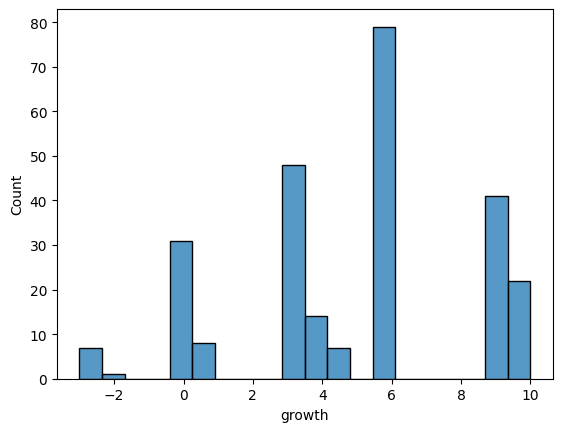

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="growth", bins=20)
plt.show()

## Negative growth

In [89]:
df[df['growth'] < 0]

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,outputK,r14,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status,strain,rxn_a,rxn_b,rxn_c,no_deletions,del_r15,del_OutputN,del_r10,del_InputA,del_InputI,del_r2,del_r3,del_r4,del_r14
243,0.000000e+00,0.1,-1.100000,-2.200000,1.200000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.480297e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,2.220446e-16,0.000000e+00,1.000000e+00,0.0,0.0,-3.000000e+00,1.0,"InputA,InputI",-3.000000e+00,infeasible,1,InputA,InputI,None,2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
684,0.000000e+00,0.0,-1.000000,-2.000000,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.480297e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,-3.330669e-16,0.000000e+00,1.000000e+00,0.0,0.0,-3.000000e+00,1.0,"r3,InputA,InputI",-3.000000e+00,infeasible,1,r3,InputA,InputI,3,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
874,0.000000e+00,-1.0,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.480297e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,2.220446e-16,0.000000e+00,1.000000e+00,0.0,0.0,-3.000000e+00,1.0,"r2,InputA,InputI",-3.000000e+00,infeasible,1,r2,InputA,InputI,3,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1045,0.000000e+00,-1.0,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.480297e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,2.220446e-16,0.000000e+00,1.000000e+00,0.0,0.0,-3.000000e+00,1.0,"r4,InputA,InputI",-3.000000e+00,infeasible,1,r4,InputA,InputI,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1728,0.000000e+00,0.1,-1.100000,-2.200000,1.200000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.480297e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,2.220446e-16,0.000000e+00,1.000000e+00,0.0,0.0,-3.000000e+00,1.0,"r10,InputA,InputI",-3.000000e+00,infeasible,1,r10,InputA,InputI,3,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
1958,2.960595e-16,0.1,-1.100000,-2.200000,1.200000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.480297e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,-2.220446e-16,0.000000e+00,1.000000e+00,0.0,0.0,-3.000000e+00,1.0,"r14,InputA,InputI",-3.000000e+00,infeasible,1,r14,InputA,InputI,3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1979,2.960595e-16,0.1,-1.100000,-2.200000,1.200000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.480297e-16,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,-2.220446e-16,0.000000e+00,1.000000e+00,0.0,0.0,-3.000000e+00,1.0,"r15,InputA,InputI",-3.000000e+00,infeasible,1,r15,InputA,InputI,3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2009,7.401487e-17,0.1,-0.433333,-0.866667,2.000000e-01,-6.666667e-01,-6.666667e-01,-1.000000e+00,-1.110223e-16,3.333333e-01,3.333333e-01,2.775558e-16,2.775558e-16,1.0,3.333333e-01,3.333333e-01,3.515706e-16,0.0,0.0,-2.000000e+00,0.0,"InputA,InputI,OutputN",-2.000000e+00,infeasible,1,InputA,InputI,OutputN,3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2544,1.000000e+00,0.0,0.000000,0.000000,-4.255855e-16,-2.035409e-15,-1.924387e-15,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.572816e-16,-1.110223e-16,3.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,0.0,-1.332268e-15,0.0,"r3,r2,OutputN",-1.332268e-15,optimal,2,r3,r2,OutputN,3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2562,1.000000e+00,0.0,0.000000,0.000000,-7.956598e-16,-2.072416e-15,-1.942890e-15,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.220446e-16,-1.110223e-16,3.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,0.0,-2.997602e-15,0.0,"r3,r4,OutputN",-2.997602e-15,optimal,2,r3,r4,OutputN,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


11 rows of __negative__ growth

Replace negative growth with 0

In [91]:
for row in range(len(df)):
    if(df['growth'].iloc[row] < 0): df['growth'].iloc[row] = 0

/tmp/ipykernel_13728/766195947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if(df['growth'].iloc[row] < 0): df['growth'].iloc[row] = 0


## Create _dummy variables_ for `status`

In [95]:
dummy_status = pd.get_dummies(df['status'])
df = pd.concat([df, dummy_status], axis=1)
df.head()

,r1,r3,r2,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,outputK,r14,r15,r16,InputA,InputI,OutputX,OutputN,id,growth,status,strain,rxn_a,rxn_b,rxn_c,no_deletions,del_r15,del_OutputN,del_r10,del_InputA,del_InputI,del_r2,del_r3,del_r4,del_r14,infeasible,optimal
1,1.0,0.0,1.0,2.0,1.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r3,9.0,optimal,1,r3,None,None,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
2,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r2,9.0,optimal,1,r2,None,None,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,1.0,0.0,0.0,3.0,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r4,9.0,optimal,1,r4,None,None,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
9,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r10,9.0,optimal,1,r10,None,None,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
14,1.0,0.1,0.9,1.8,1.2,3.0,3.0,3.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,9.0,1.0,r14,9.0,optimal,1,r14,None,None,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


### Check Linear Correlations

##### Point Biserial Correlation

In [96]:
pearsons = df.drop(columns=critical_rxn).corr(numeric_only=True)['optimal'].sort_values(ascending=False)
spearman = df.drop(columns=critical_rxn).corr(numeric_only=True, method='spearman')['optimal'].sort_values(ascending=False)

corr_matrix = pd.DataFrame({'pearsons':pearsons, 'spearman':spearman})
corr_matrix.sort_values(by='pearsons')

,pearsons,spearman
infeasible,-1.000000,-1.000000
no_deletions,-0.250378,-0.241754
InputI,-0.218214,-0.218214
r14,-0.207541,-0.296564
r15,-0.207541,-0.160858
del_InputA,-0.186290,-0.186290
del_r4,-0.130705,-0.130705
del_r2,-0.130705,-0.130705
OutputN,-0.127978,-0.107804
del_OutputN,-0.112176,-0.112176


# AI / ML Ideas

## Create _training_ and _test_ sets and _data normalization_

Create a `df` keeping only _non critical_ reactions.

In [97]:
df.drop(columns=critical_rxn, inplace=True)

In [98]:
df.columns

Index(['r3', 'r2', 'r4', 'r10', 'r14', 'r15', 'InputA', 'InputI', 'OutputN',
       'id', 'growth', 'status', 'strain', 'rxn_a', 'rxn_b', 'rxn_c',
       'no_deletions', 'del_r15', 'del_OutputN', 'del_r10', 'del_InputA',
       'del_InputI', 'del_r2', 'del_r3', 'del_r4', 'del_r14', 'infeasible',
       'optimal'],
      dtype='object')

In [99]:
cols_to_drop = ['id', 'rxn_a', 'rxn_b', 'rxn_c', 'status']
df.drop(columns=cols_to_drop, inplace=True)

df.head()

,r3,r2,r4,r10,r14,r15,InputA,InputI,OutputN,growth,status,strain,no_deletions,del_r15,del_OutputN,del_r10,del_InputA,del_InputI,del_r2,del_r3,del_r4,del_r14,infeasible,optimal
1,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,optimal,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,optimal,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,9.0,optimal,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1
9,0.1,0.9,1.8,0.0,0.0,0.0,1.0,1.0,1.0,9.0,optimal,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
14,0.1,0.9,1.8,0.0,0.0,0.0,1.0,1.0,1.0,9.0,optimal,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1


In [100]:
df.shape

(258, 24)

### Basic ML libraries

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Define **target** variable

We need to better define the target that we want to predict!

(The most simple and obvious answer is to predit **optimal** column)

Πρέπει το reduced μοντέλο να είναι __optimal__ και το `growth` να έχει τιμή ίδια με εκείνη του πλήρες μοντέλου.

In [120]:
X = df.drop(['optimal', 'infeasible'], axis=1)
y = df['optimal']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, stratify=y, random_state=42)

(258, 21)
(258,)


Use of stratify sampling to get the same optimal/infeasible rates on train and test sets as to the original dataset.

In [121]:
# normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### SVM Classifier

In [122]:
svc_model, svc_scores = train_svm(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 2/3; 5/20] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=5;, score=0.885 total time=   0.0s
[CV 2/3; 8/20] START colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7
[CV 2/3; 8/20] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.755 total time=   0.0s
[CV 3/3; 8/20] START colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7
[CV 3/3; 8/20] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=7;, score=0.766 total time=   0.0s
[CV 3/3; 13/20] START colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=7
[CV 3/3; 13/20] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15

In [123]:
validation_classification(svc_model, X_test_scaled, y_test)

ROC-AUC = 0.8506944444444444


### XGBoost Classifier

In [124]:
xgb_model, xgb_scores = xgb_classifier(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 3/3; 4/20] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=1;, score=0.936 total time=   0.0s
[CV 3/3; 9/20] START colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1
[CV 3/3; 9/20] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1;, score=0.940 total time=   0.0s
[CV 1/3; 10/20] START colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7
[CV 1/3; 10/20] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7;, score=0.736 total time=   0.0s
[CV 2/3; 16/20] START colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=7
[CV 2/3; 16/20] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=7;, score=0.733 total time=   0.0s
[CV 3/3; 16/20] START colsample_bytree=0.4, gamma=0.0, learning_rate=0.2,

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 2/3; 7/20] START C=0.01, gamma=0.1, kernel=rbf..............................
[CV 2/3; 7/20] END C=0.01, gamma=0.1, kernel=rbf;, score=0.959 total time=   0.0s
[CV 3/3; 11/20] START C=1, gamma=0.5, kernel=rbf................................
[CV 3/3; 11/20] END .C=1, gamma=0.5, kernel=rbf;, score=0.917 total time=   0.0s
[CV 1/3; 12/20] START C=100, gamma=1, kernel=rbf................................
[CV 1/3; 12/20] END .C=100, gamma=1, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/3; 17/20] START C=0.01, gamma=0.1, kernel=linear..........................
[CV 1/3; 17/20] END C=0.01, gamma=0.1, kernel=linear;, score=0.760 total time=   0.0s
[CV 1/3; 18/20] START C=0.05, gamma=10, kernel=linear...........................
[CV 1/3; 18/20] END C=0.05, gamma=10, kernel=linear;, score=0.737 total time=   0.

In [125]:
validation_classification(xgb_model, X_test_scaled, y_test)

ROC-AUC = 0.8784722222222222


# Feature Importance to detect reactions for knock-out

In [126]:
import dalex as dx

exp = dx.Explainer(xgb_model, X_train, y_train)

Preparation of a new explainer is initiated

  -> data              : 206 rows 21 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 206 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : Not specified, model's class short name will be used. (default)
  -> predict function  : <function yhat_proba_default at 0x7f4f2cdd7ca0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.328, mean = 0.909, max = 0.998
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.995, mean = -0.219, max = 0.3
  -> model_info        : package xgboost

A new explainer has been created!


In [127]:
exp.model_parts(type='variable_importance').plot(max_vars=None)

In [128]:
import shap

explainer = shap.TreeExplainer(xgb_model, X_train_scaled, feature_names=X_train.columns)
shap_values = explainer(X_test_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


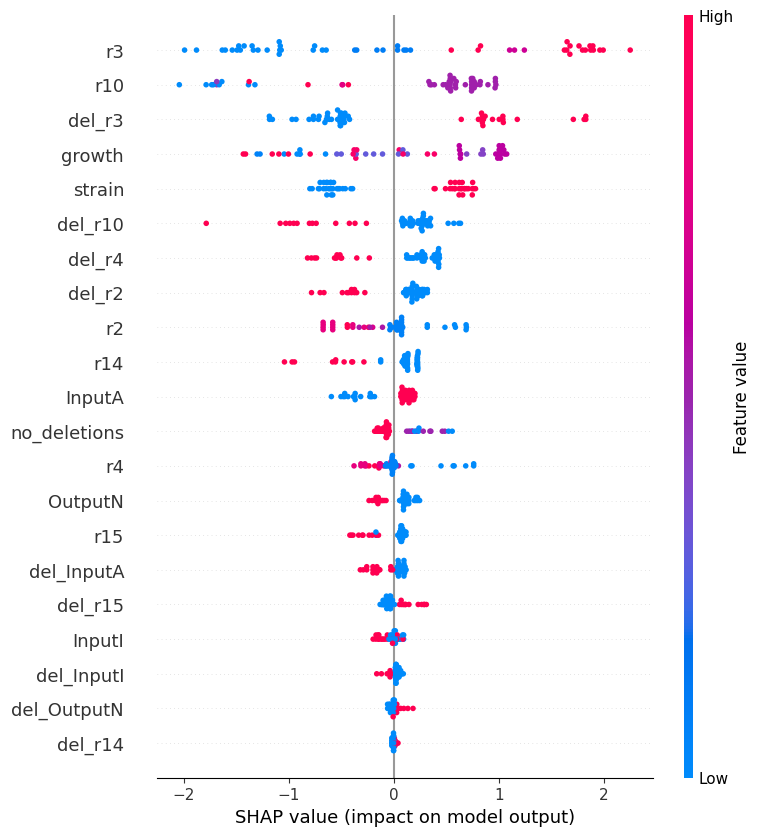

In [129]:
shap.plots.beeswarm(shap_values, max_display=X_train.shape[1])

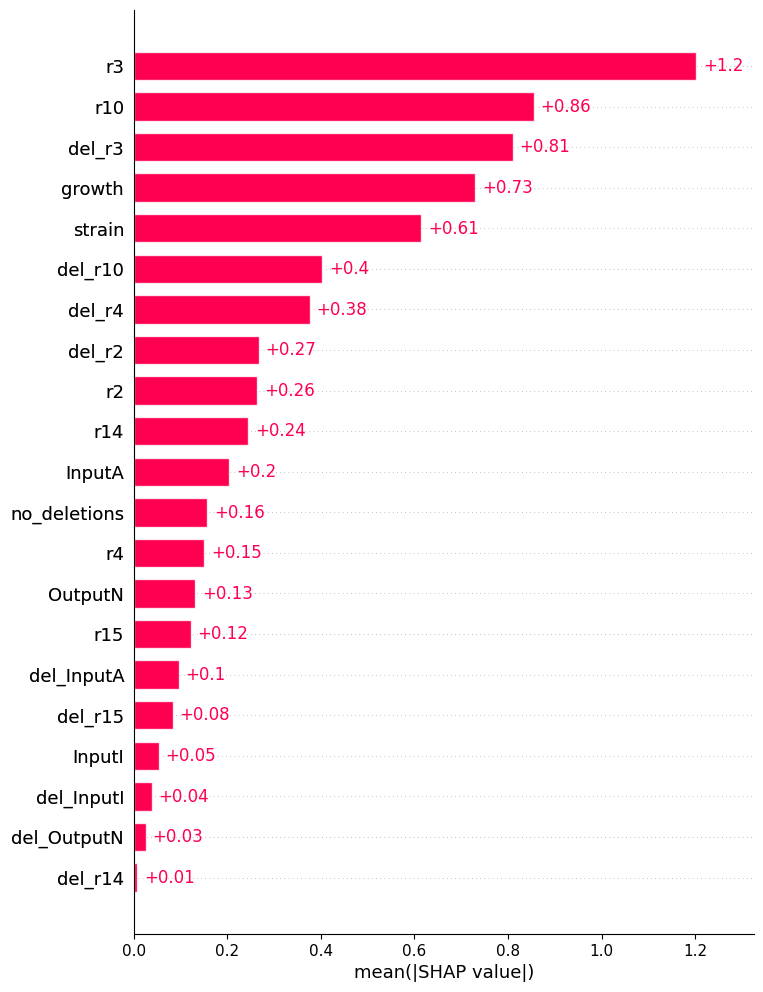

In [130]:
shap.plots.bar(shap_values, max_display=X_test.shape[1])

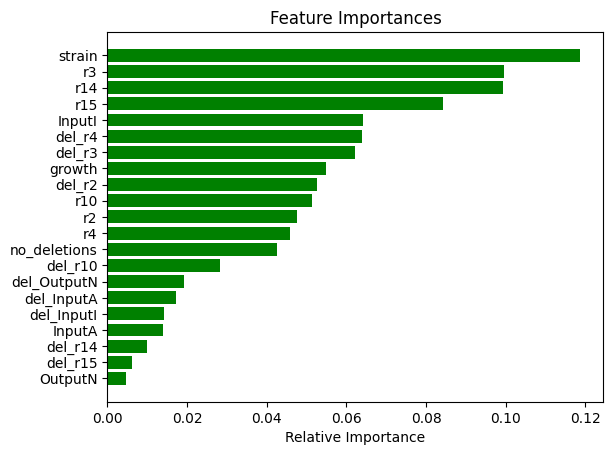

In [119]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Artificial Neural Networks

In [131]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2022-11-14 14:09:38.126889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-14 14:09:38.559602: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-14 14:09:38.559616: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-14 14:09:38.604061: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-14 14:09:39.463782: W tensorflow/stream_executor/platform/de

In [132]:
n_inputs = len(X_train.columns)

In [134]:
model = Sequential()
model.add(Dense(120, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ])

history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=5)

2022-11-14 14:10:15.902224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-14 14:10:15.902501: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-14 14:10:15.902522: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (comex-dell): /proc/driver/nvidia/version does not exist
2022-11-14 14:10:15.903311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
42/42 [==============================] - 1s 1ms/step - loss: 0.6705 - accuracy: 0.6602 - precision: 0.7338 - recall: 0.7958     
Epoch 2/10
42/42 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8641 - precision: 0.8750 - recall: 0.9366
Epoch 3/10
42/42 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.9175 - precision: 0.9195 - recall: 0.9648
Epoch 4/10
42/42 [==============================] - 0s 1ms/step - loss: 0.2077 - accuracy: 0.9417 - precision: 0.9514 - recall: 0.9648
Epoch 5/10
42/42 [==============================] - 0s 1ms/step - loss: 0.1645 - accuracy: 0.9709 - precision: 0.9857 - recall: 0.9718
Epoch 6/10
42/42 [==============================] - 0s 1ms/step - loss: 0.1302 - accuracy: 0.9854 - precision: 1.0000 - recall: 0.9789
Epoch 7/10
42/42 [==============================] - 0s 2ms/step - loss: 0.1083 - accuracy: 0.9757 - precision: 0.9928 - recall: 0.9718
Epoch 8/10
42/42 [==============================] 

In [135]:
validation_classification(model, X_test_scaled, y_test)

2/2 [==============================] - 0s 2ms/step
ROC-AUC = 0.953125


In [136]:
import shap


explainer = shap.DeepExplainer(model, X_train_scaled)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [137]:
shap_values = explainer.shap_values(X_test_scaled)

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


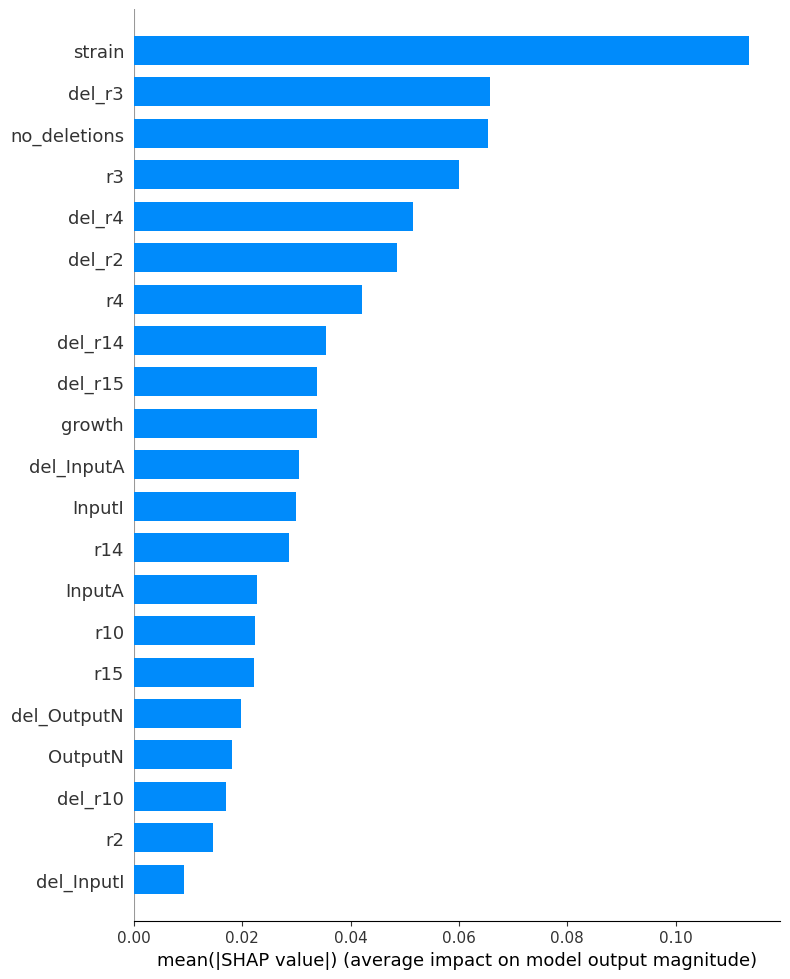

In [138]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X_test.columns, max_display=X_test.shape[1])